In [39]:
from sklearn.utils import class_weight
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,train_test_split,StratifiedKFold,KFold,cross_val_score,GroupKFold
from sklearn.feature_selection import RFE,VarianceThreshold,RFECV,SelectFromModel
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import pointbiserialr
from rdkit import Chem
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from sklearn.decomposition import PCA
from rdkit.Chem import AllChem
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [17]:
def PCA_func(fingerprint1,fingerprint2):

    print(np.array(fingerprint1).shape)
    print(np.array(fingerprint2).shape)
    # 將PCA結果轉換為DataFrame
    train_pca_df = pd.DataFrame(data=fingerprint1, columns=['PC1', 'PC2'])
    test_pca_df = pd.DataFrame(data=fingerprint2, columns=['PC1', 'PC2'])

    # 繪製化學空間分佈圖
    plt.scatter(train_pca_df['PC1'], train_pca_df['PC2'], c='blue', label='Non-Toxicity')
    plt.scatter(test_pca_df['PC1'], test_pca_df['PC2'], c='red', label='Toxicity')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Chemical Space Distribution')
    plt.legend()
    plt.show()
def PCA_func1(fingerprint1,fingerprint2):

    print(np.array(fingerprint1).shape)
    print(np.array(fingerprint2).shape)
    # 將PCA結果轉換為DataFrame
    train_pca_df = pd.DataFrame(data=fingerprint1, columns=['PC1', 'PC2'])
    test_pca_df = pd.DataFrame(data=fingerprint2, columns=['PC1', 'PC2'])

    # 繪製化學空間分佈圖
    plt.scatter(train_pca_df['PC1'], train_pca_df['PC2'], c='blue', label='Train')
    plt.scatter(test_pca_df['PC1'], test_pca_df['PC2'], c='red', label='Test')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Chemical Space Distribution')
    plt.legend()
    plt.show()
pca = PCA(n_components=2)

In [3]:
data = pd.read_csv("data/train_raw_data.csv",index_col=0)
data["Toxicity"].value_counts()

Toxicity
0    5968
1    1542
Name: count, dtype: int64

In [4]:
from rdkit import DataStructs
num = 1
fingerprints = []
for x in data["Inchi"]:
    mol = Chem.MolFromInchi(x)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fp_arr = np.array([int(x) for x in fp_arr], dtype=np.float32)
    fingerprints.append(fp_arr)

[18:00:22] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match; Proton balance: Does not match)

[18:00:24] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Missing, Attachment points)

[18:00:25] WARNING: not removing hydrogen atom without neighbors
[18:00:25] WARNING: not removing hydrogen atom without neighbors


In [6]:
label = data["Toxicity"]

(6008, 2)
(1502, 2)


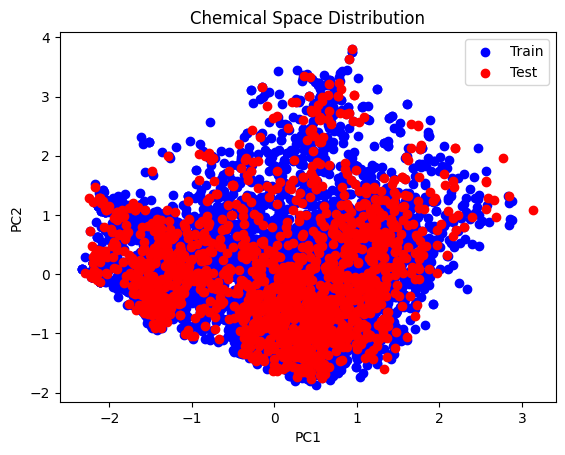

In [19]:
#train test 有覆蓋所以可以預測
X_train,X_test,y_train,y_test = train_test_split(fingerprints,label,train_size=0.8,random_state=44,stratify=label)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
PCA_func1(X_train_pca,X_test_pca)

(4774, 2)
(1234, 2)


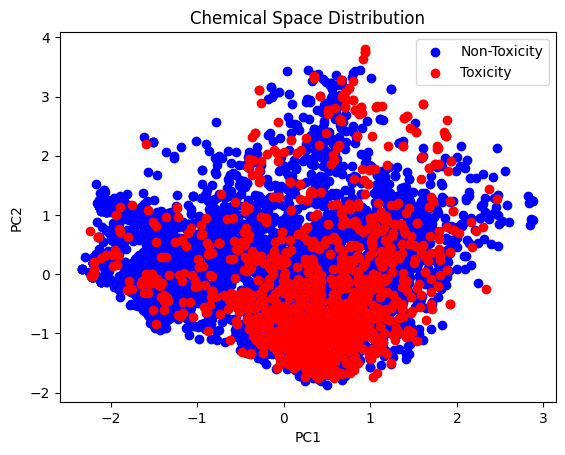

In [20]:
# 分離陽性和陰性樣本 all data
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)


(1194, 2)
(308, 2)


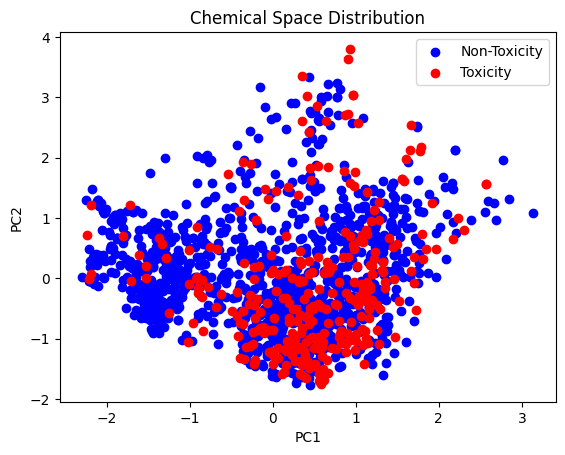

In [21]:
# 分離陽性和陰性樣本 all data
positive_indices = np.where(y_test == 1)[0]
negative_indices = np.where(y_test == 0)[0]

positive_samples = np.array(X_test_pca)[positive_indices]
negative_samples = np.array(X_test_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)

(3088, 2048) (3088,)
Toxicity
0    1546
1    1542
Name: count, dtype: int64


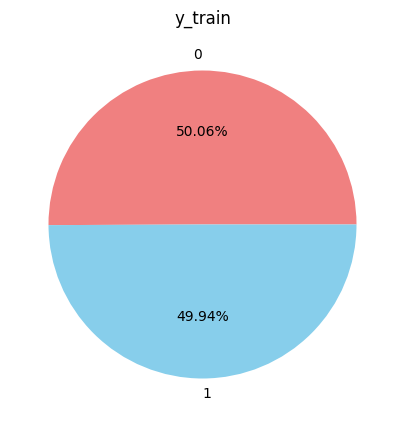

In [28]:
#Using GradientBoostingClassifier as Undersampling method
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import InstanceHardnessThreshold
X_train, y_train = InstanceHardnessThreshold(estimator=GradientBoostingClassifier()).fit_resample(fingerprints, label)
print(np.array(X_train).shape,np.array(y_train).shape)
plt.figure( figsize=(10,5) )
print(pd.Series(y_train).value_counts())
pd.Series(y_train).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'y_train' )  # 圖標題
plt.ylabel( '' )
plt.show()

(1546, 2)
(1542, 2)


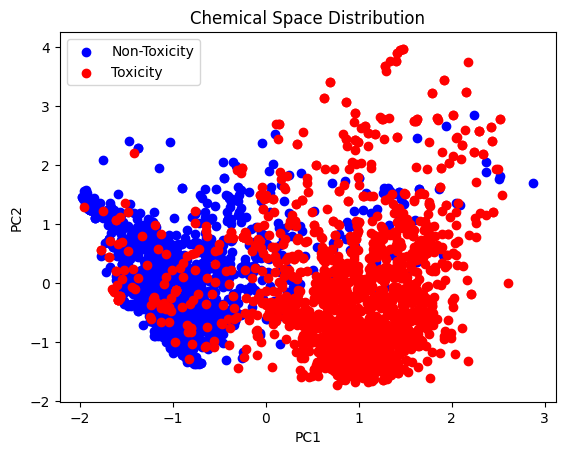

In [29]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)



(3084, 2048) (3084,)
Toxicity
0    1542
1    1542
Name: count, dtype: int64


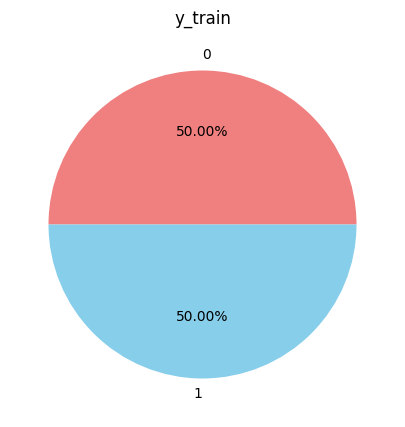

In [30]:
from imblearn.under_sampling import RandomUnderSampler
X_train, y_train = RandomUnderSampler().fit_resample(fingerprints, label)
print(np.array(X_train).shape,np.array(y_train).shape)
plt.figure( figsize=(10,5) )
print(pd.Series(y_train).value_counts())
pd.Series(y_train).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'y_train' )  # 圖標題
plt.ylabel( '' )
plt.show()

(1542, 2)
(1542, 2)


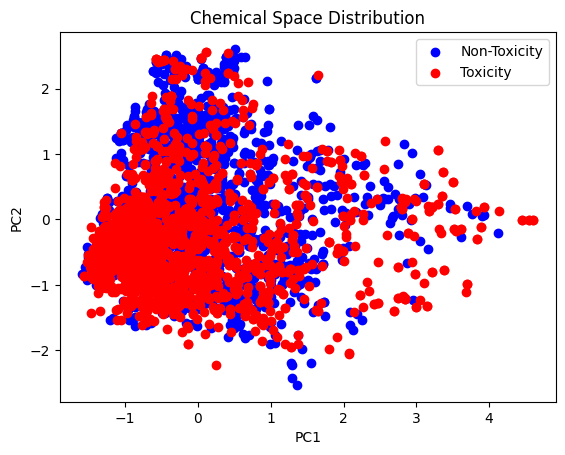

In [31]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)



(3084, 2048) (3084,)
Toxicity
0    1542
1    1542
Name: count, dtype: int64


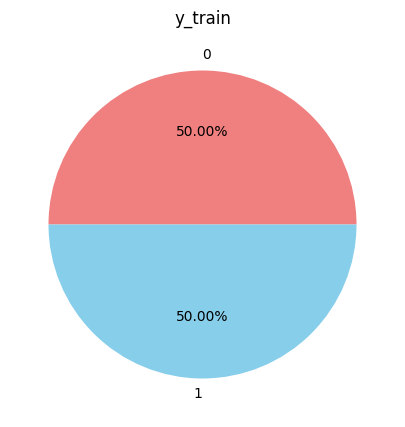

(1542, 2)
(1542, 2)


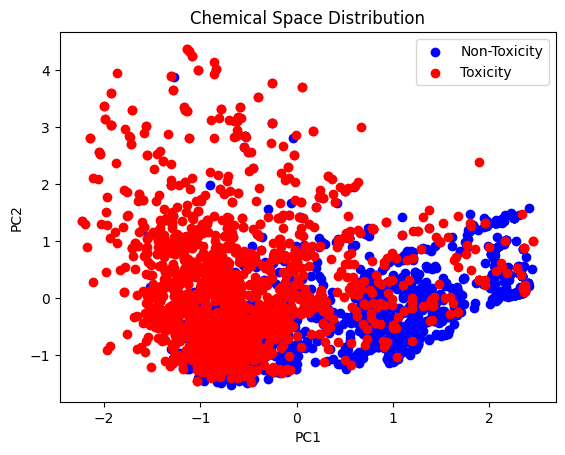

In [32]:
from imblearn.under_sampling import NearMiss
X_train, y_train = NearMiss().fit_resample(fingerprints, label)
print(np.array(X_train).shape,np.array(y_train).shape)
plt.figure( figsize=(10,5) )
print(pd.Series(y_train).value_counts())
pd.Series(y_train).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'y_train' )  # 圖標題
plt.ylabel( '' )
plt.show()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)



In [33]:
from rdkit import DataStructs
num = 1
fingerprint_mac = []
for x in data["Inchi"]:
    mol = Chem.MolFromInchi(x)
    fp = AllChem.GetMACCSKeysFingerprint(mol)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fp_arr = np.array([int(x) for x in fp_arr], dtype=np.float32)
    fingerprint_mac.append(fp_arr)

[18:16:26] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number, Number; Charge(s): Do not match; Proton balance: Does not match)

[18:16:29] WARNING:  Problems/mismatches: Mobile-H( Hydrogens: Locations or number; Mobile-H groups: Missing, Attachment points)

[18:16:30] WARNING: not removing hydrogen atom without neighbors
[18:16:30] WARNING: not removing hydrogen atom without neighbors


(3084, 167) (3084,)
Toxicity
0    1542
1    1542
Name: count, dtype: int64


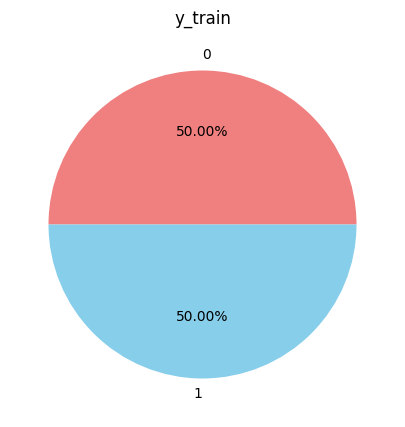

In [34]:
#Using GradientBoostingClassifier as Undersampling method
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import InstanceHardnessThreshold
X_train, y_train = InstanceHardnessThreshold(estimator=GradientBoostingClassifier()).fit_resample(fingerprint_mac, label)
print(np.array(X_train).shape,np.array(y_train).shape)
plt.figure( figsize=(10,5) )
print(pd.Series(y_train).value_counts())
pd.Series(y_train).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'y_train' )  # 圖標題
plt.ylabel( '' )
plt.show()

(1542, 2)
(1542, 2)


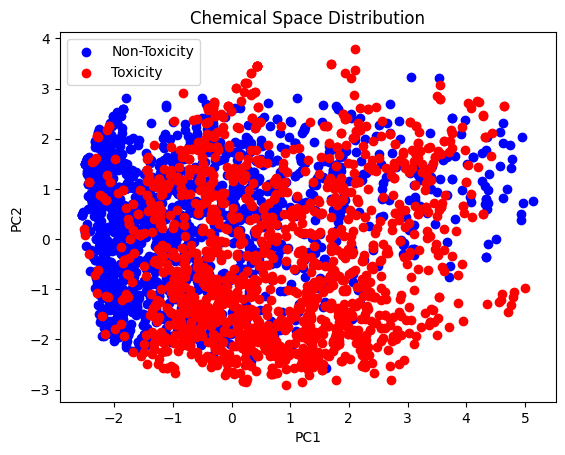

In [35]:
X_train_pca = pca.fit_transform(X_train)

# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)



In [ ]:
#Result: Using morganfingerprint and instancethreshold received the best result to divide the dataset


(3085, 2048) (3085,)
Toxicity
0    1543
1    1542
Name: count, dtype: int64


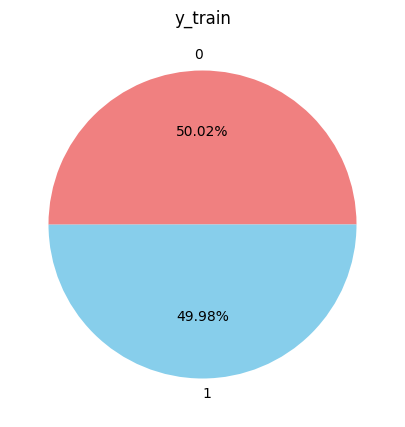

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.under_sampling import InstanceHardnessThreshold
X_train, y_train = InstanceHardnessThreshold(estimator=GradientBoostingClassifier()).fit_resample(fingerprints, label)
print(np.array(X_train).shape,np.array(y_train).shape)
plt.figure( figsize=(10,5) )
print(pd.Series(y_train).value_counts())
pd.Series(y_train).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'y_train' )  # 圖標題
plt.ylabel( '' )
plt.show()

(1543, 2)
(1542, 2)


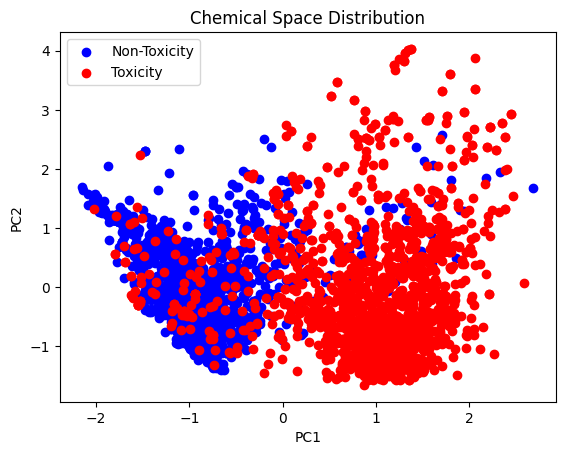

(5968, 2)
(1542, 2)


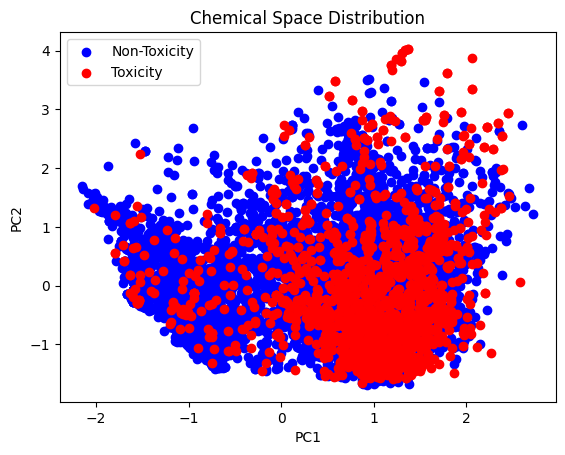

In [38]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(fingerprints)
# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)

positive_indices = np.where(label == 1)[0]
negative_indices = np.where(label == 0)[0]

positive_samples = np.array(X_test_pca)[positive_indices]
negative_samples = np.array(X_test_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)

In [ ]:
# So we have to do feature selection 

In [41]:
# 假設 X 是特徵，y 是目標變數
# X, y = load_your_data_here()

# 使用隨機森林進行特徵選擇
clf = RandomForestClassifier(random_state=0,class_weight="balanced")
clf.fit(np.array(fingerprints), np.array(label))
model = SelectFromModel(clf, prefit=True)

# 決定我們要試驗的特徵重要性閾值
thresholds = np.sort(np.unique(clf.feature_importances_))

best_score = 0
best_threshold = 0
best_X = None

# 在迴圈開始前初始化兩個空列表
n_list = []
scores_list = []

for thresh in thresholds:
    # 選擇重要性大於閾值的特徵
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X = selection.transform(np.array(fingerprints))
    
    # 進行交叉驗證
    scores = cross_val_score(clf, select_X, np.array(label), cv=5, scoring='f1')
    mean_score = scores.mean()
    
    print(f"Thresh={thresh}, n={select_X.shape[1]}, Accuracy: {mean_score:.2f} (+/- {scores.std():.2f})")

    # 如果這個閾值的得分比我們之前找到的得分還高，則更新最佳閾值和數據集
    if mean_score > best_score:
        best_score = mean_score
        best_threshold = thresh
        best_X = select_X

    # 將每個閾值和對應的評分添加到列表中
    n_list.append(select_X.shape[1])
    scores_list.append(mean_score)


Thresh=5.641071969608128e-06, n=2048, Accuracy: 0.57 (+/- 0.05)
Thresh=8.472511242349407e-06, n=2047, Accuracy: 0.59 (+/- 0.04)
Thresh=1.0178331705425671e-05, n=2046, Accuracy: 0.58 (+/- 0.04)
Thresh=1.1991341066292653e-05, n=2045, Accuracy: 0.59 (+/- 0.05)
Thresh=1.242342418212338e-05, n=2044, Accuracy: 0.58 (+/- 0.05)
Thresh=1.4354771659150922e-05, n=2043, Accuracy: 0.58 (+/- 0.04)
Thresh=1.449678630516543e-05, n=2042, Accuracy: 0.59 (+/- 0.05)
Thresh=1.5072357072877934e-05, n=2041, Accuracy: 0.57 (+/- 0.05)
Thresh=1.5085984801709773e-05, n=2040, Accuracy: 0.58 (+/- 0.05)
Thresh=1.7063550667135144e-05, n=2039, Accuracy: 0.58 (+/- 0.05)
Thresh=1.7194275461415168e-05, n=2038, Accuracy: 0.59 (+/- 0.05)
Thresh=1.7268796057564663e-05, n=2037, Accuracy: 0.58 (+/- 0.05)
Thresh=1.778026176248947e-05, n=2036, Accuracy: 0.58 (+/- 0.05)
Thresh=1.805631684470071e-05, n=2035, Accuracy: 0.59 (+/- 0.04)
Thresh=1.8142859802932146e-05, n=2034, Accuracy: 0.59 (+/- 0.05)
Thresh=1.9846359417813697e-05, 

Thresh=6.154980454397237e-05, n=1920, Accuracy: 0.58 (+/- 0.04)
Thresh=6.189920060631273e-05, n=1919, Accuracy: 0.58 (+/- 0.05)
Thresh=6.245179666358746e-05, n=1918, Accuracy: 0.58 (+/- 0.05)
Thresh=6.287521119117212e-05, n=1917, Accuracy: 0.59 (+/- 0.05)
Thresh=6.295418341275449e-05, n=1916, Accuracy: 0.58 (+/- 0.06)
Thresh=6.314827895184226e-05, n=1915, Accuracy: 0.59 (+/- 0.06)
Thresh=6.357928315299736e-05, n=1914, Accuracy: 0.57 (+/- 0.05)
Thresh=6.364315102373948e-05, n=1913, Accuracy: 0.58 (+/- 0.05)
Thresh=6.401691697827165e-05, n=1912, Accuracy: 0.59 (+/- 0.05)
Thresh=6.428946531643257e-05, n=1911, Accuracy: 0.58 (+/- 0.06)
Thresh=6.483485698486585e-05, n=1910, Accuracy: 0.58 (+/- 0.05)
Thresh=6.490469764352974e-05, n=1909, Accuracy: 0.58 (+/- 0.05)
Thresh=6.492862087194791e-05, n=1908, Accuracy: 0.58 (+/- 0.05)
Thresh=6.504582812991288e-05, n=1907, Accuracy: 0.59 (+/- 0.05)
Thresh=6.53088087933792e-05, n=1906, Accuracy: 0.58 (+/- 0.05)
Thresh=6.539457126793087e-05, n=1905, Acc

Thresh=9.623745424386855e-05, n=1791, Accuracy: 0.58 (+/- 0.05)
Thresh=9.625081829056546e-05, n=1790, Accuracy: 0.58 (+/- 0.05)
Thresh=9.719421584187103e-05, n=1789, Accuracy: 0.59 (+/- 0.05)
Thresh=9.737651512999202e-05, n=1788, Accuracy: 0.58 (+/- 0.05)
Thresh=9.76212261364054e-05, n=1787, Accuracy: 0.58 (+/- 0.05)
Thresh=9.772093982397273e-05, n=1786, Accuracy: 0.59 (+/- 0.04)
Thresh=9.779616775569354e-05, n=1785, Accuracy: 0.59 (+/- 0.05)
Thresh=9.782509167868211e-05, n=1784, Accuracy: 0.58 (+/- 0.05)
Thresh=9.807007225707695e-05, n=1783, Accuracy: 0.58 (+/- 0.05)
Thresh=9.815225512594292e-05, n=1782, Accuracy: 0.58 (+/- 0.05)
Thresh=9.85069647142465e-05, n=1781, Accuracy: 0.58 (+/- 0.04)
Thresh=9.85233036120696e-05, n=1780, Accuracy: 0.58 (+/- 0.05)
Thresh=9.86630629019632e-05, n=1779, Accuracy: 0.59 (+/- 0.05)
Thresh=9.927925593281206e-05, n=1778, Accuracy: 0.58 (+/- 0.05)
Thresh=9.932563596976372e-05, n=1777, Accuracy: 0.59 (+/- 0.05)
Thresh=9.95647052782114e-05, n=1776, Accurac

Thresh=0.00012217898660379006, n=1664, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00012233119834341138, n=1663, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00012260322069956457, n=1662, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00012273318509103753, n=1661, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00012275014303286973, n=1660, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00012285588764242197, n=1659, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001229117424425546, n=1658, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00012303788000489715, n=1657, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001231363900296696, n=1656, Accuracy: 0.58 (+/- 0.06)
Thresh=0.00012318928800093988, n=1655, Accuracy: 0.58 (+/- 0.04)
Thresh=0.00012353357257238517, n=1654, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00012391360432817815, n=1653, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00012416132973105262, n=1652, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0001245178992469513, n=1651, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00012481813165492804, n=1650, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001250909570902093

Thresh=0.0001507071730241547, n=1537, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00015080731780655715, n=1536, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001508743374922987, n=1535, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001514122650430411, n=1534, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0001516773164167429, n=1533, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001518945732226682, n=1532, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00015194221088322548, n=1531, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00015210677534013625, n=1530, Accuracy: 0.58 (+/- 0.06)
Thresh=0.0001522513377177727, n=1529, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00015245506253512033, n=1528, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00015260248845552006, n=1527, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00015279913590233345, n=1526, Accuracy: 0.58 (+/- 0.05)
Thresh=0.000152989070084472, n=1525, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00015311657069527849, n=1524, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0001535291866233068, n=1523, Accuracy: 0.59 (+/- 0.06)
Thresh=0.0001535533557083086, n=15

Thresh=0.0001780318281131438, n=1410, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00017807153356963297, n=1409, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00017837166023551416, n=1408, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00017839662397158235, n=1407, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00017858566311920932, n=1406, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00017874859891368154, n=1405, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0001789088568854872, n=1404, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00017916852599702567, n=1403, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00017919625654881419, n=1402, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00017930097177686795, n=1401, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00017980596063641653, n=1400, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00017996399163179987, n=1399, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00018015626125241367, n=1398, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0001803259415974608, n=1397, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00018093923967820762, n=1396, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0001811810404924631

Thresh=0.00020358231093531374, n=1283, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002038872896491854, n=1282, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00020425951216877176, n=1281, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00020426659135113742, n=1280, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00020518113671711799, n=1279, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00020550378068464638, n=1278, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002056955978305064, n=1277, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00020613707472999396, n=1276, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0002063516873777941, n=1275, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002065093890306463, n=1274, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00020672696382005552, n=1273, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00020693409775164484, n=1272, Accuracy: 0.58 (+/- 0.06)
Thresh=0.0002070904873703533, n=1271, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00020736189309297472, n=1270, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00020737692182177755, n=1269, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002073927690694285, 

Thresh=0.00023747853361986315, n=1156, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002381974515283973, n=1155, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00023862784795712673, n=1154, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00023871322749391283, n=1153, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002391908864798807, n=1152, Accuracy: 0.59 (+/- 0.05)
Thresh=0.000239553557197636, n=1151, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002395554775797285, n=1150, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00023989300872377032, n=1149, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0002400888217212608, n=1148, Accuracy: 0.58 (+/- 0.04)
Thresh=0.00024030239484156075, n=1147, Accuracy: 0.58 (+/- 0.06)
Thresh=0.00024030391440715243, n=1146, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0002406154984937614, n=1145, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002408666961764227, n=1144, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002413368669078166, n=1143, Accuracy: 0.58 (+/- 0.06)
Thresh=0.0002413953598419984, n=1142, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00024160837053493252, n=11

Thresh=0.0002723437620736487, n=1028, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00027236493181517557, n=1027, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002727755407154965, n=1026, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002730484628104225, n=1025, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002732254866518832, n=1024, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002735122267894303, n=1023, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002735475691611824, n=1022, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0002737032343173763, n=1021, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0002738878157515534, n=1020, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0002744270871371569, n=1019, Accuracy: 0.60 (+/- 0.05)
Thresh=0.00027509607303406183, n=1018, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0002752058915610305, n=1017, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0002755833403330218, n=1016, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00027571231375511445, n=1015, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00027577712322526696, n=1014, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0002759495517298509, n=1013

Thresh=0.0003139177909787606, n=899, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00031393823534002984, n=898, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0003144780374739857, n=897, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00031469456137462134, n=896, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0003152399816425182, n=895, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00031535761189713186, n=894, Accuracy: 0.59 (+/- 0.06)
Thresh=0.00031576644091442735, n=893, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0003163740984995735, n=892, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0003173682375801031, n=891, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0003182048862360244, n=890, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0003183199747426678, n=889, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00031904607260529387, n=888, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0003190610266656996, n=887, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00031927015470980944, n=886, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0003192984918071977, n=885, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0003193190325387013, n=884, Accuracy: 0.

Thresh=0.0003659535853841405, n=769, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00036613285527120544, n=768, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0003667620520861879, n=767, Accuracy: 0.58 (+/- 0.05)
Thresh=0.000367033488220452, n=766, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00036763205851278425, n=765, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00036806764623101995, n=764, Accuracy: 0.58 (+/- 0.04)
Thresh=0.00036829045831584986, n=763, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0003688718489185302, n=762, Accuracy: 0.58 (+/- 0.04)
Thresh=0.00036923454479272365, n=761, Accuracy: 0.58 (+/- 0.04)
Thresh=0.00036963407598005464, n=760, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00036969937321308216, n=759, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00036992194634722394, n=758, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00036996986299055233, n=757, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00037034629459519326, n=756, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00037050922909694, n=755, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0003714807783325399, n=754, Accuracy: 0

Thresh=0.00042413748166620204, n=639, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0004245093317656576, n=638, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0004254696409392256, n=637, Accuracy: 0.58 (+/- 0.04)
Thresh=0.00042602359305685204, n=636, Accuracy: 0.59 (+/- 0.04)
Thresh=0.00042869873209005213, n=635, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00042879306964832705, n=634, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0004294102364885055, n=633, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0004297980700594016, n=632, Accuracy: 0.59 (+/- 0.05)
Thresh=0.00042986289577566484, n=631, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0004299420004014803, n=630, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0004304941966173801, n=629, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0004319861903886196, n=628, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0004321666159265396, n=627, Accuracy: 0.58 (+/- 0.05)
Thresh=0.00043314404770649197, n=626, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0004332715393228264, n=625, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0004335989645598572, n=624, Accuracy: 0.

Thresh=0.0005059119330818715, n=509, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0005063751069055747, n=508, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0005067534719565381, n=507, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0005070680155102571, n=506, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0005079237391117277, n=505, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0005088713825752214, n=504, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0005107296812283234, n=503, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0005110038012597275, n=502, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0005115616399544881, n=501, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0005116574169449957, n=500, Accuracy: 0.59 (+/- 0.05)
Thresh=0.000513515376242004, n=499, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0005136725299760666, n=498, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0005138887496378386, n=497, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0005142668319921138, n=496, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0005142669453573507, n=495, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0005158251424264298, n=494, Accuracy: 0.59 (+/-

Thresh=0.0006236182732359049, n=378, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006237419615748183, n=377, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006249262203336067, n=376, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006267858284634201, n=375, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0006291869528673557, n=374, Accuracy: 0.59 (+/- 0.04)
Thresh=0.0006302603088472956, n=373, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006304500685447993, n=372, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006324966292681799, n=371, Accuracy: 0.57 (+/- 0.04)
Thresh=0.0006331092385875822, n=370, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0006331916768022279, n=369, Accuracy: 0.59 (+/- 0.05)
Thresh=0.0006333027391692955, n=368, Accuracy: 0.58 (+/- 0.03)
Thresh=0.000635842634386865, n=367, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0006371647177978554, n=366, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006392272195315413, n=365, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006406719603567062, n=364, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0006413260720845759, n=363, Accuracy: 0.58 (+/-

Thresh=0.0008517118758949289, n=247, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0008518835055775277, n=246, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008618645793736211, n=245, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008620638114251703, n=244, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008633281999598063, n=243, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008648920409961487, n=242, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0008714045278065799, n=241, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008742013432585388, n=240, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0008755898581249347, n=239, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008757999638892288, n=238, Accuracy: 0.58 (+/- 0.05)
Thresh=0.000877155470294254, n=237, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008775031517656914, n=236, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008781045226678247, n=235, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0008834524768594442, n=234, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0008849901347322136, n=233, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0008919780352423513, n=232, Accuracy: 0.58 (+/-

Thresh=0.001410742139975375, n=116, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0014186165096268756, n=115, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0014270451637311684, n=114, Accuracy: 0.57 (+/- 0.04)
Thresh=0.0014295190658792072, n=113, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0014357860711094205, n=112, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0014432968539770943, n=111, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0014452764841216144, n=110, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0014526489999775352, n=109, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0014563036085599107, n=108, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0014671432052448213, n=107, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0014699844875687568, n=106, Accuracy: 0.57 (+/- 0.05)
Thresh=0.0014974617561557902, n=105, Accuracy: 0.58 (+/- 0.04)
Thresh=0.001514648954198654, n=104, Accuracy: 0.58 (+/- 0.05)
Thresh=0.0015276921660777878, n=103, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0015319035558618965, n=102, Accuracy: 0.58 (+/- 0.04)
Thresh=0.0015320494666347443, n=101, Accuracy: 0.58 (+/- 

Best threshold=0.0002744270871371569, Accuracy: 0.60


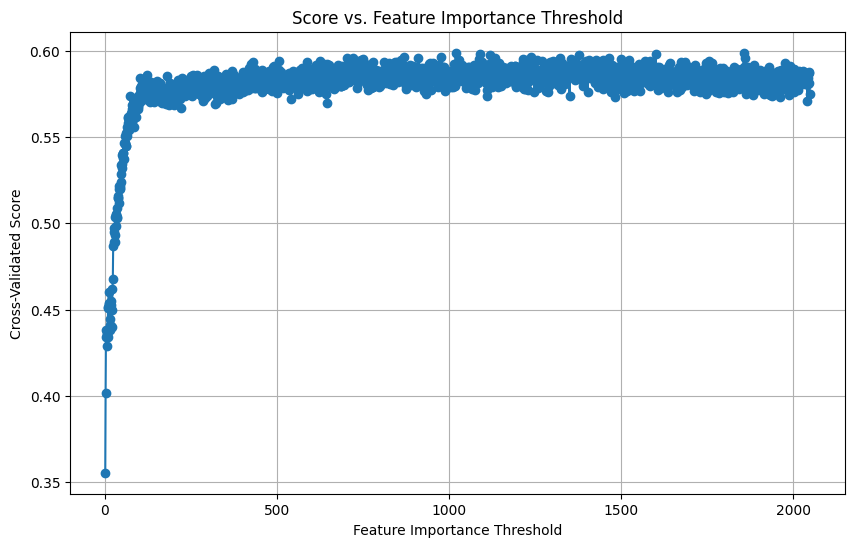

In [42]:
print(f"Best threshold={best_threshold}, Accuracy: {best_score:.2f}")

# 使用 matplotlib 繪製圖形
plt.figure(figsize=(10, 6))
plt.plot(n_list, scores_list, marker='o')
plt.title('Score vs. Feature Importance Threshold')
plt.xlabel('Feature Importance Threshold')
plt.ylabel('Cross-Validated Score')
plt.grid()
plt.show()

(5968, 2)
(1542, 2)


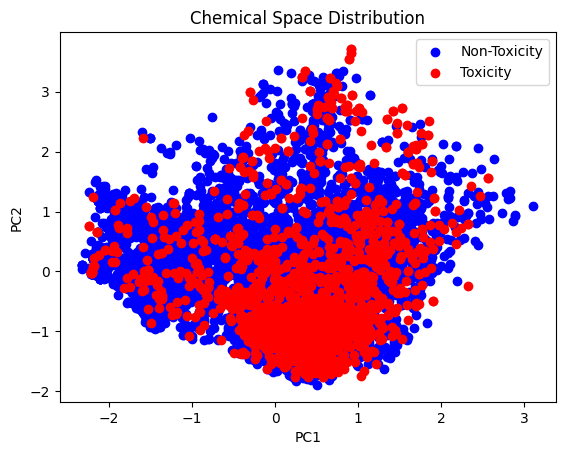

In [43]:
X_train_pca = pca.fit_transform(best_X)

# 分離陽性和陰性樣本 
positive_indices = np.where(label == 1)[0]
negative_indices = np.where(label == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 假設 X 是特徵，y 是目標變數
# X, y = load_your_data_here()

# 計算互信息
mi = mutual_info_classif(np.array(fingerprints), np.array(label))

# 決定我們要試驗的特徵數量
k_values = range(1, len(mi)+1)

best_score = 0
best_k = 0
best_X = None

# 在迴圈開始前初始化兩個空列表
k_list = []
scores_list = []

for k in k_values:
    # 選擇前k個最重要的特徵
    selection = SelectKBest(score_func=mutual_info_classif, k=k)
    select_X = selection.fit_transform(np.array(fingerprints), np.array(label))
    
    # 使用隨機森林進行交叉驗證
    clf = RandomForestClassifier(random_state=0,class_weight="balanced")
    scores = cross_val_score(clf, select_X, np.array(label), cv=5, scoring='f1')
    mean_score = scores.mean()
    
    print(f"K={k}, n={select_X.shape[1]}, Accuracy: {mean_score:.2f} (+/- {scores.std():.2f})")

    # 如果這個k值的得分比我們之前找到的得分還高，則更新最佳k值和數據集
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
        best_X = select_X

    # 將每個k值和對應的評分添加到列表中
    k_list.append(k)
    scores_list.append(mean_score)

print(f"Best k={best_k}, Accuracy: {best_score:.2f}")


K=1, n=1, Accuracy: 0.40 (+/- 0.03)
K=2, n=2, Accuracy: 0.41 (+/- 0.04)
K=3, n=3, Accuracy: 0.41 (+/- 0.04)
K=4, n=4, Accuracy: 0.39 (+/- 0.04)
K=5, n=5, Accuracy: 0.43 (+/- 0.04)
K=6, n=6, Accuracy: 0.44 (+/- 0.04)
K=7, n=7, Accuracy: 0.41 (+/- 0.04)
K=8, n=8, Accuracy: 0.44 (+/- 0.05)
K=9, n=9, Accuracy: 0.43 (+/- 0.04)
K=10, n=10, Accuracy: 0.44 (+/- 0.05)
K=11, n=11, Accuracy: 0.45 (+/- 0.04)
K=12, n=12, Accuracy: 0.43 (+/- 0.05)
K=13, n=13, Accuracy: 0.44 (+/- 0.05)
K=14, n=14, Accuracy: 0.43 (+/- 0.05)
K=15, n=15, Accuracy: 0.46 (+/- 0.05)
K=16, n=16, Accuracy: 0.45 (+/- 0.05)
K=17, n=17, Accuracy: 0.46 (+/- 0.04)
K=18, n=18, Accuracy: 0.47 (+/- 0.04)
K=19, n=19, Accuracy: 0.44 (+/- 0.04)
K=20, n=20, Accuracy: 0.44 (+/- 0.04)
K=21, n=21, Accuracy: 0.45 (+/- 0.04)
K=22, n=22, Accuracy: 0.46 (+/- 0.05)
K=23, n=23, Accuracy: 0.44 (+/- 0.04)
K=24, n=24, Accuracy: 0.47 (+/- 0.03)
K=25, n=25, Accuracy: 0.47 (+/- 0.06)
K=26, n=26, Accuracy: 0.45 (+/- 0.04)
K=27, n=27, Accuracy: 0.45 (+/

K=212, n=212, Accuracy: 0.56 (+/- 0.03)
K=213, n=213, Accuracy: 0.52 (+/- 0.04)
K=214, n=214, Accuracy: 0.52 (+/- 0.04)
K=215, n=215, Accuracy: 0.54 (+/- 0.04)
K=216, n=216, Accuracy: 0.52 (+/- 0.03)
K=217, n=217, Accuracy: 0.52 (+/- 0.03)
K=218, n=218, Accuracy: 0.55 (+/- 0.03)
K=219, n=219, Accuracy: 0.52 (+/- 0.02)


In [ ]:
print(f"Best k={best_k}, Accuracy: {best_score:.2f}")
# 使用 matplotlib 繪製圖形
plt.figure(figsize=(10, 6))
plt.plot(k_list, scores_list, marker='o')
plt.title('Score vs. Feature Importance Threshold')
plt.xlabel('Feature Importance Threshold')
plt.ylabel('Cross-Validated Score')
plt.grid()
plt.show()

In [ ]:
X_train_pca = pca.fit_transform(best_X)

# 分離陽性和陰性樣本 
positive_indices = np.where(label == 1)[0]
negative_indices = np.where(label == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)



In [ ]:
# We also try to use smoten as over sampling method to know the distribution of pca

In [ ]:
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.over_sampling  import SMOTEN
X_train, y_train = SMOTEN().fit_resample(np.array(fingerprints), np.array(label))
print(np.array(X_train).shape,np.array(y_train).shape)
X_train, y_train = InstanceHardnessThreshold(estimator=GradientBoostingClassifier(),random_state= 44).fit_resample(X_train,y_train)
print(np.array(X_train).shape,np.array(y_train).shape)

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(fingerprints)
# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)

positive_indices = np.where(label == 1)[0]
negative_indices = np.where(label == 0)[0]

positive_samples = np.array(X_test_pca)[positive_indices]
negative_samples = np.array(X_test_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)

In [ ]:
#Using both feature selection and over fitting mothod to received the distribution of pca

In [ ]:
# 使用隨機森林進行特徵選擇
clf = RandomForestClassifier(random_state=0,class_weight="balanced")
clf.fit(np.array(X_train), np.array(y_train))
model = SelectFromModel(clf, prefit=True)

# 決定我們要試驗的特徵重要性閾值
thresholds = np.sort(np.unique(clf.feature_importances_))

best_score = 0
best_threshold = 0
best_X = None

# 在迴圈開始前初始化兩個空列表
n_list = []
scores_list = []

for thresh in thresholds:
    # 選擇重要性大於閾值的特徵
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X = selection.transform(np.array(X_train))
    
    # 進行交叉驗證
    scores = cross_val_score(clf, select_X, np.array(y_train), cv=5, scoring='f1')
    mean_score = scores.mean()
    
    print(f"Thresh={thresh}, n={select_X.shape[1]}, Accuracy: {mean_score:.2f} (+/- {scores.std():.2f})")

    # 如果這個閾值的得分比我們之前找到的得分還高，則更新最佳閾值和數據集
    if mean_score > best_score:
        best_score = mean_score
        best_threshold = thresh
        best_X = select_X

    # 將每個閾值和對應的評分添加到列表中
    n_list.append(select_X.shape[1])
    scores_list.append(mean_score)

In [ ]:
print(f"Best threshold={best_threshold}, Accuracy: {best_score:.2f}")

# 使用 matplotlib 繪製圖形
plt.figure(figsize=(10, 6))
plt.plot(n_list, scores_list, marker='o')
plt.title('Score vs. Feature Importance Threshold')
plt.xlabel('Feature Importance Threshold')
plt.ylabel('Cross-Validated Score')
plt.grid()
plt.show()

In [ ]:
X_train_pca = pca.fit_transform(best_X)
X_test_pca = pca.transform(fingerprints)
# 分離陽性和陰性樣本 
positive_indices = np.where(y_train == 1)[0]
negative_indices = np.where(y_train == 0)[0]

positive_samples = np.array(X_train_pca)[positive_indices]
negative_samples = np.array(X_train_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)

positive_indices = np.where(label == 1)[0]
negative_indices = np.where(label == 0)[0]

positive_samples = np.array(X_test_pca)[positive_indices]
negative_samples = np.array(X_test_pca)[negative_indices]


PCA_func(negative_samples,positive_samples)